## Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

##### Dataset link :https://www.kaggle.com/datasets/imtkaggleteam/air-traffic-landings

lets us start working on the project 

## What we will do in this Projects?
##### 1)first we will load the data in this notebook.
##### 2)we will clean the data first if neccesary.
##### 3)making some plots using matplotlib, seaborn, plotly.express
##### 4)we will make power bi dashboard to show all this on a single page.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import requests
import plotly.express as px
import plotly.graph_objects as go

##### loading the data here.

In [2]:
data = pd.read_csv('air-traffic-landings-statistics.csv')
data.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,201809,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ2,-,30,1410000
1,201809,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Airbus,A320,-,125,17787978
2,201809,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Passenger,Wide Body,Boeing,B773,-,30,16620000
3,201809,"COPA Airlines, Inc.",CM,"COPA Airlines, Inc.",CM,International,Central America,Passenger,Narrow Body,Boeing,B739,-,3,491700
4,201809,Hong Kong Airlines Limited,HX,Hong Kong Airlines Limited,HX,International,Asia,Passenger,Wide Body,Airbus,A359,-,16,7301712


##### Information about the data like shape , size, info, describe, checking the null values.

In [3]:
data.shape

(22047, 14)

In [4]:
data.size

308658

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22047 entries, 0 to 22046
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              22047 non-null  int64 
 1   Operating Airline            22047 non-null  object
 2   Operating Airline IATA Code  21972 non-null  object
 3   Published Airline            22047 non-null  object
 4   Published Airline IATA Code  21972 non-null  object
 5   GEO Summary                  22047 non-null  object
 6   GEO Region                   22047 non-null  object
 7   Landing Aircraft Type        22047 non-null  object
 8   Aircraft Body Type           22047 non-null  object
 9   Aircraft Manufacturer        22036 non-null  object
 10  Aircraft Model               22047 non-null  object
 11  Aircraft Version             20889 non-null  object
 12  Landing Count                22047 non-null  int64 
 13  Total Landed Weight          22

##### checking the null values of the datasets

In [6]:
data.isnull().sum()

Activity Period                   0
Operating Airline                 0
Operating Airline IATA Code      75
Published Airline                 0
Published Airline IATA Code      75
GEO Summary                       0
GEO Region                        0
Landing Aircraft Type             0
Aircraft Body Type                0
Aircraft Manufacturer            11
Aircraft Model                    0
Aircraft Version               1158
Landing Count                     0
Total Landed Weight               0
dtype: int64

##### checking the rows duplicated or not?

In [7]:
data.duplicated().sum()

2

##### lets us remove the duplicate rows

In [8]:
data.drop_duplicates(inplace  =True)

In [9]:
data.shape

(22045, 14)

##### So lets start clean the data first

In [10]:
data.isna().sum()

Activity Period                   0
Operating Airline                 0
Operating Airline IATA Code      75
Published Airline                 0
Published Airline IATA Code      75
GEO Summary                       0
GEO Region                        0
Landing Aircraft Type             0
Aircraft Body Type                0
Aircraft Manufacturer            11
Aircraft Model                    0
Aircraft Version               1158
Landing Count                     0
Total Landed Weight               0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22045 entries, 0 to 22046
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              22045 non-null  int64 
 1   Operating Airline            22045 non-null  object
 2   Operating Airline IATA Code  21970 non-null  object
 3   Published Airline            22045 non-null  object
 4   Published Airline IATA Code  21970 non-null  object
 5   GEO Summary                  22045 non-null  object
 6   GEO Region                   22045 non-null  object
 7   Landing Aircraft Type        22045 non-null  object
 8   Aircraft Body Type           22045 non-null  object
 9   Aircraft Manufacturer        22034 non-null  object
 10  Aircraft Model               22045 non-null  object
 11  Aircraft Version             20887 non-null  object
 12  Landing Count                22045 non-null  int64 
 13  Total Landed Weight          22

In [12]:
data.drop(columns=['Aircraft Version'],inplace = True)

In [13]:
mode_value = data['Operating Airline IATA Code'].mode()[0]
data['Operating Airline IATA Code'].fillna(mode_value, inplace=True)

In [14]:
mode_value1 = data['Published Airline IATA Code'].mode()[0]
data['Published Airline IATA Code'].fillna(mode_value1, inplace=True)

In [15]:
mode_value2 = data['Aircraft Manufacturer'].mode()[0]
data['Aircraft Manufacturer'].fillna(mode_value2, inplace=True)

In [16]:
data.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Landing Count,Total Landed Weight
0,201809,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ2,30,1410000
1,201809,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Airbus,A320,125,17787978
2,201809,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Passenger,Wide Body,Boeing,B773,30,16620000
3,201809,"COPA Airlines, Inc.",CM,"COPA Airlines, Inc.",CM,International,Central America,Passenger,Narrow Body,Boeing,B739,3,491700
4,201809,Hong Kong Airlines Limited,HX,Hong Kong Airlines Limited,HX,International,Asia,Passenger,Wide Body,Airbus,A359,16,7301712


In [17]:
data.drop(columns=['Activity Period'],inplace = True)

##### so the data is clean lets make some using matplotlib, seaborn, plotly.express

lets us see first the unique values in the datasets

In [18]:
data.tail()

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Landing Count,Total Landed Weight
22042,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,Passenger,Regional Jet,Bombardier,CRJ,155,7285000
22043,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Regional Jet,Bombardier,CRJ,268,17956000
22044,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ,62,4154000
22045,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Regional Jet,Bombardier,CRJ,1360,63920000
22046,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Turbo Prop,Embraer,ERJ,1655,42699000


In [19]:
data['Operating Airline'].value_counts() #107 unique values. nice

United Airlines                     2646
United Airlines - Pre 07/01/2013    1834
Alaska Airlines                     1340
Delta Air Lines                     1305
SkyWest Airlines                    1219
                                    ... 
Trego Dugan Aviation                   2
Focus Air                              2
E.A.G.L.E.                             1
Xtra Airways                           1
Boeing Company                         1
Name: Operating Airline, Length: 107, dtype: int64

In [20]:
data['Operating Airline IATA Code'].value_counts() # 95 abbreviation of the operatine airline. 

UA    4555
AS    1340
DL    1305
OO    1219
AA     848
      ... 
IB       6
DH       5
5X       4
4T       3
XP       1
Name: Operating Airline IATA Code, Length: 95, dtype: int64

In [21]:
data['Published Airline'].value_counts() #97 unique values of published airline.

United Airlines                     3031
United Airlines - Pre 07/01/2013    2274
Delta Air Lines                     1809
Alaska Airlines                     1492
American Airlines                    955
                                    ... 
Focus Air                              2
Trego Dugan Aviation                   2
E.A.G.L.E.                             1
Xtra Airways                           1
Boeing Company                         1
Name: Published Airline, Length: 97, dtype: int64

In [22]:
data['GEO Summary'].value_counts()

International    11221
Domestic         10824
Name: GEO Summary, dtype: int64

In [23]:
data['GEO Region'].value_counts()

US                     10840
Asia                    4082
Europe                  2334
Canada                  2028
Mexico                  1572
Australia / Oceania      647
Central America          326
Middle East              163
South America             50
Caribbean                  3
Name: GEO Region, dtype: int64

In [24]:
data['Landing Aircraft Type'].value_counts()

Passenger    19220
Freighter     2683
Combi          142
Name: Landing Aircraft Type, dtype: int64

In [25]:
data['Aircraft Body Type'].value_counts()

Wide Body       10144
Narrow Body      9638
Regional Jet     1758
Turbo Prop        505
Name: Aircraft Body Type, dtype: int64

In [26]:
data['Aircraft Manufacturer'].value_counts()

Boeing               13261
Airbus                5666
Bombardier            1165
McDonnell Douglas      853
Embraer                686
Beechcraft             164
Shorts                  70
Fairchild               59
DeHavilland             41
Cessna                  29
LearJet                 18
Swearingen              13
Piper                    9
BAE-Avro                 6
Lockheed                 5
Name: Aircraft Manufacturer, dtype: int64

In [27]:
data['Aircraft Model'].value_counts() #89 unique values of aircraft models.

737          3134
747          3004
A320         1919
777          1763
A319         1526
             ... 
IL-62           1
MD-87           1
C402            1
DC-3            1
CHIEFTAIN       1
Name: Aircraft Model, Length: 89, dtype: int64

##### after getting all the unique values of datasets let plot some graphs.

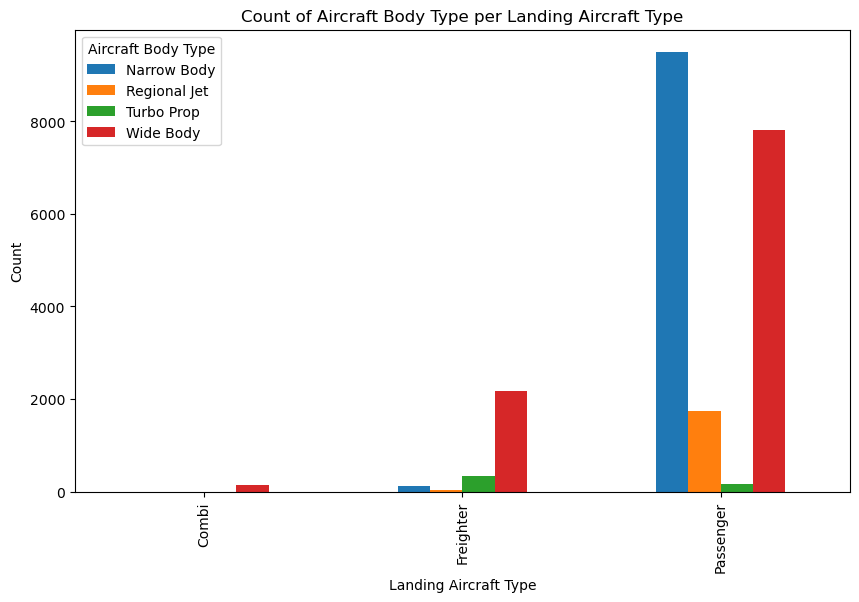

In [28]:
grouped_data = data.groupby(['Landing Aircraft Type', 'Aircraft Body Type']).size().unstack()
grouped_data.plot(kind='bar', figsize=(10, 6))

plt.title('Count of Aircraft Body Type per Landing Aircraft Type')
plt.xlabel('Landing Aircraft Type')
plt.ylabel('Count')

plt.show()


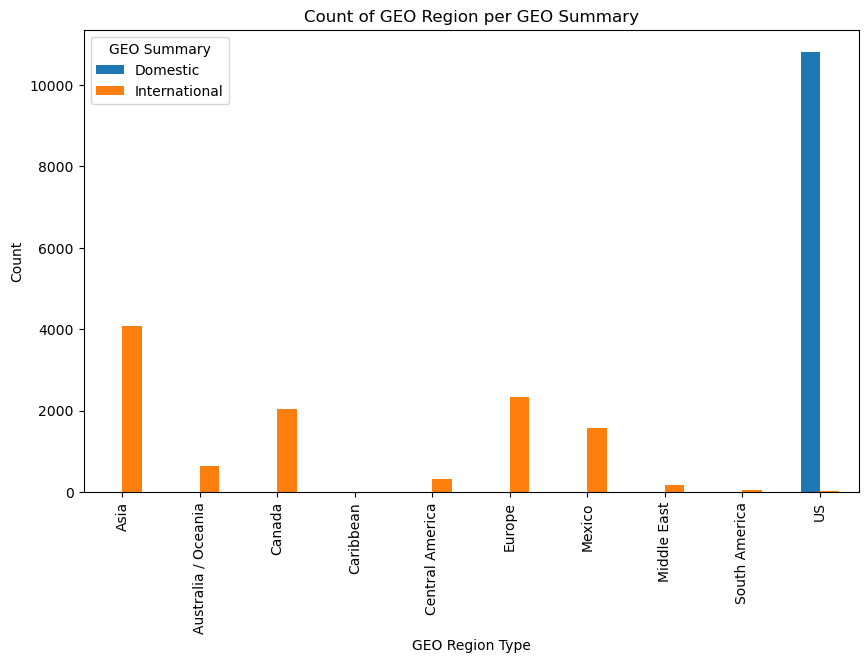

In [29]:
grouped_data = data.groupby(['GEO Region','GEO Summary']).size().unstack()
grouped_data.plot(kind='bar', figsize=(10, 6))

plt.title('Count of GEO Region per GEO Summary')
plt.xlabel('GEO Region Type')
plt.ylabel('Count')

plt.show()


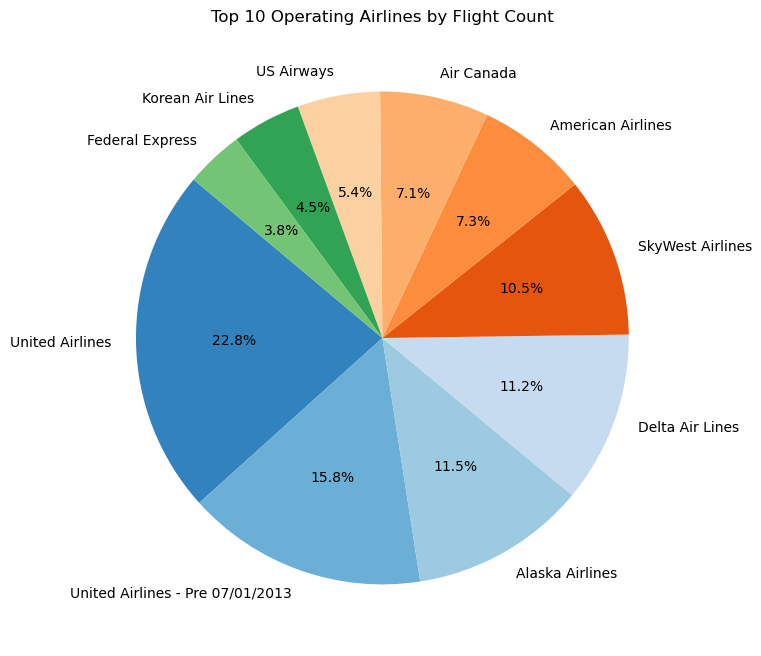

In [30]:
airline_counts = data['Operating Airline'].value_counts()

top_10_airlines = airline_counts.head(10)

custom_colors = plt.cm.tab20c.colors[:len(top_10_airlines)]


plt.figure(figsize=(8, 8))
plt.pie(top_10_airlines, labels=top_10_airlines.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)


plt.title('Top 10 Operating Airlines by Flight Count')

# Show plot
plt.show()

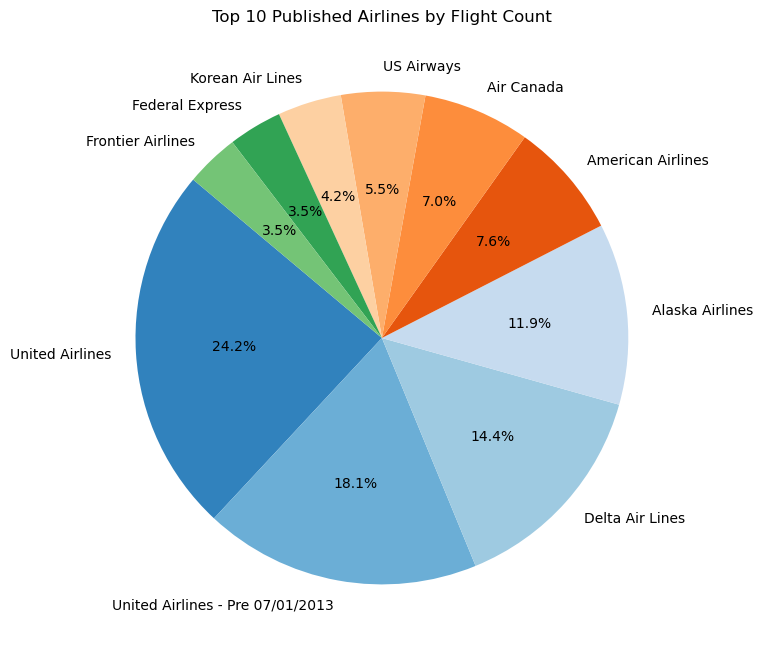

In [31]:
airline_counts = data['Published Airline'].value_counts()

top_10_airlines = airline_counts.head(10)

custom_colors = plt.cm.tab20c.colors[:len(top_10_airlines)]


plt.figure(figsize=(8, 8))
plt.pie(top_10_airlines, labels=top_10_airlines.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)


plt.title('Top 10 Published Airlines by Flight Count')

# Show plot
plt.show()

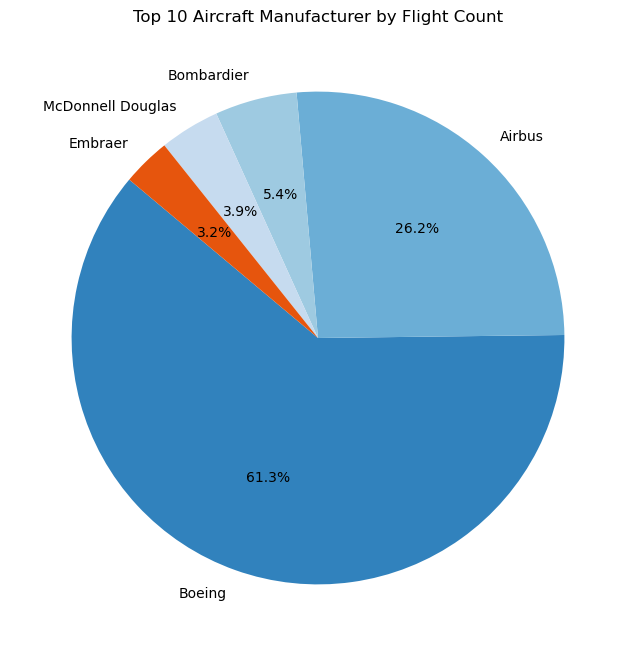

In [32]:
airline_counts = data['Aircraft Manufacturer'].value_counts()

top_10_airlines = airline_counts.head(5)

custom_colors = plt.cm.tab20c.colors[:len(top_10_airlines)]


plt.figure(figsize=(8, 8))
plt.pie(top_10_airlines, labels=top_10_airlines.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)


plt.title('Top 10 Aircraft Manufacturer by Flight Count')

# Show plot
plt.show()

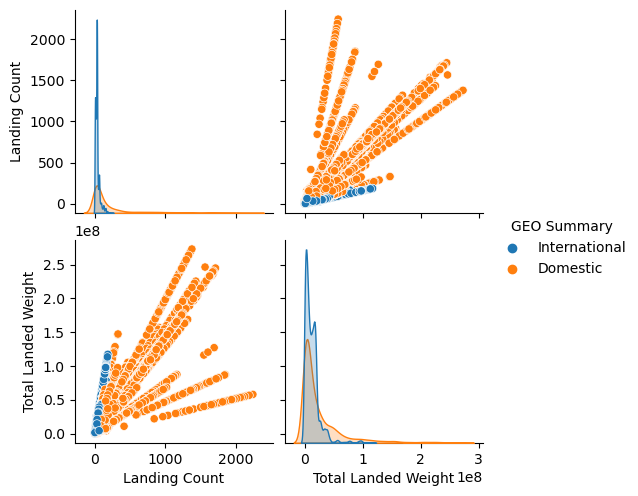

In [33]:
sns.pairplot(data, hue='GEO Summary')

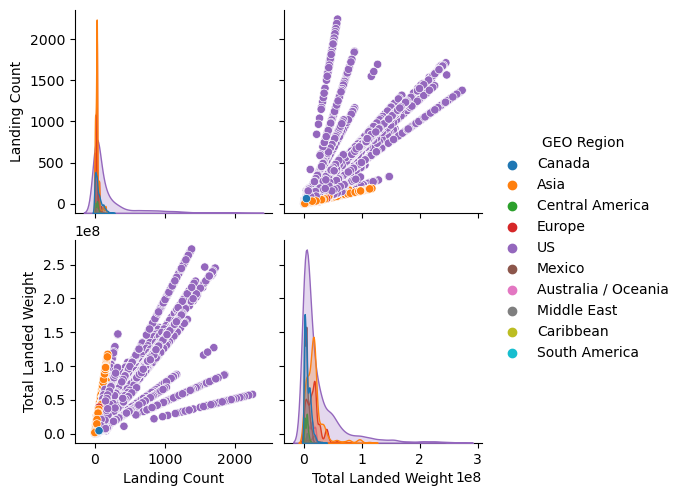

In [34]:
sns.pairplot(data, hue='GEO Region')

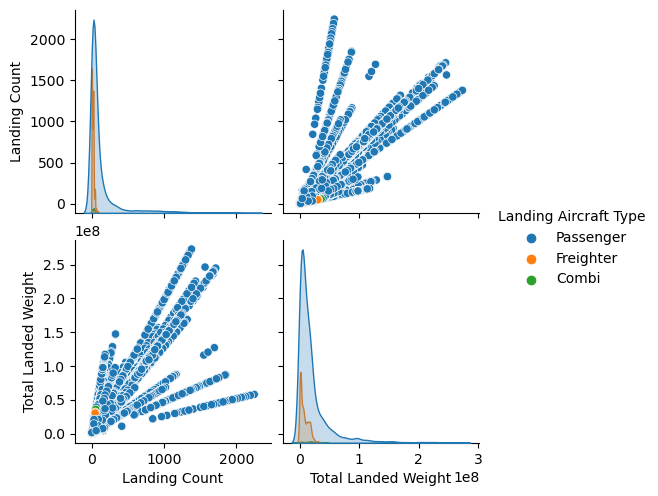

In [35]:
sns.pairplot(data, hue='Landing Aircraft Type')

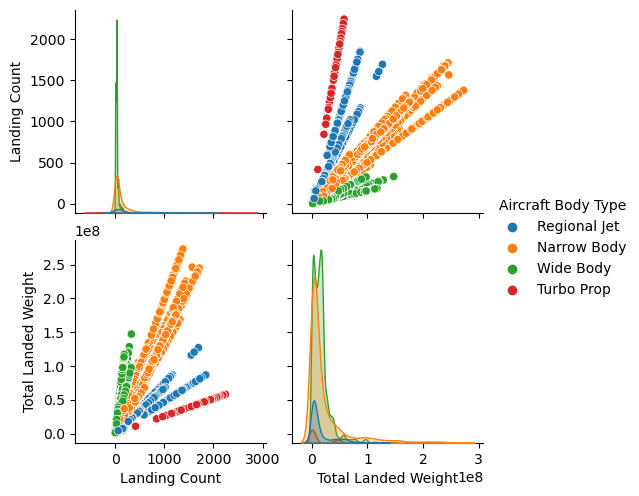

In [36]:
sns.pairplot(data, hue= 'Aircraft Body Type')

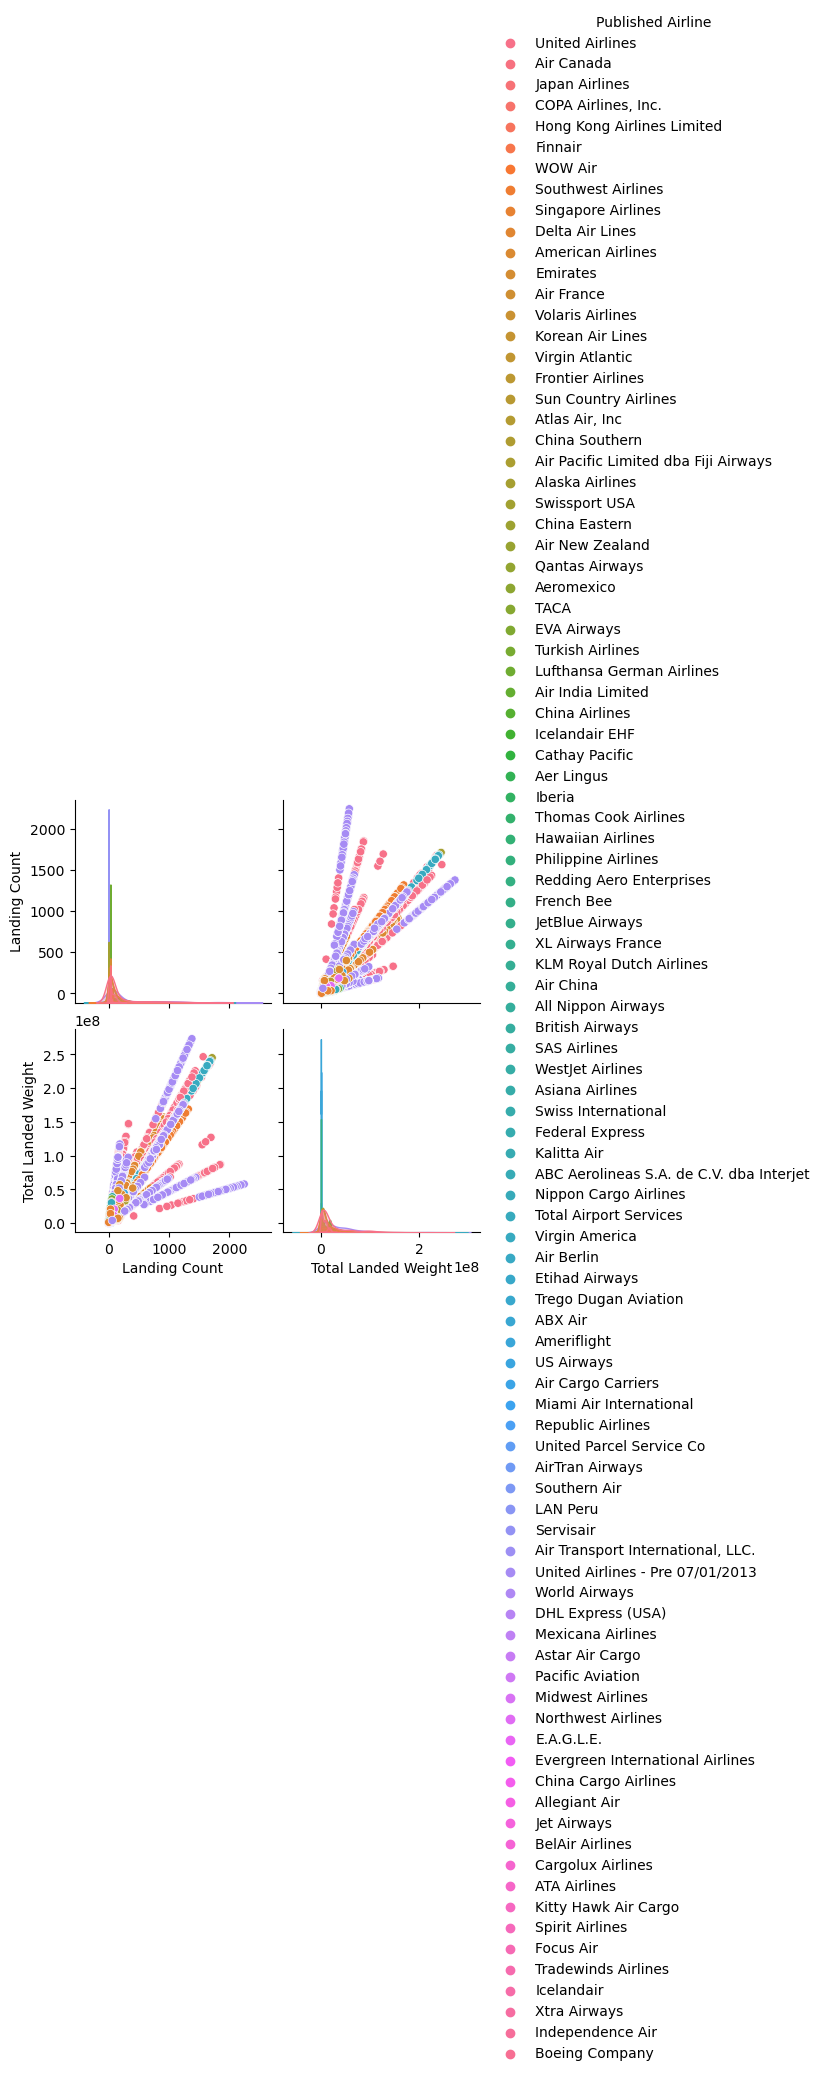

In [37]:
sns.pairplot(data, hue= 'Published Airline')

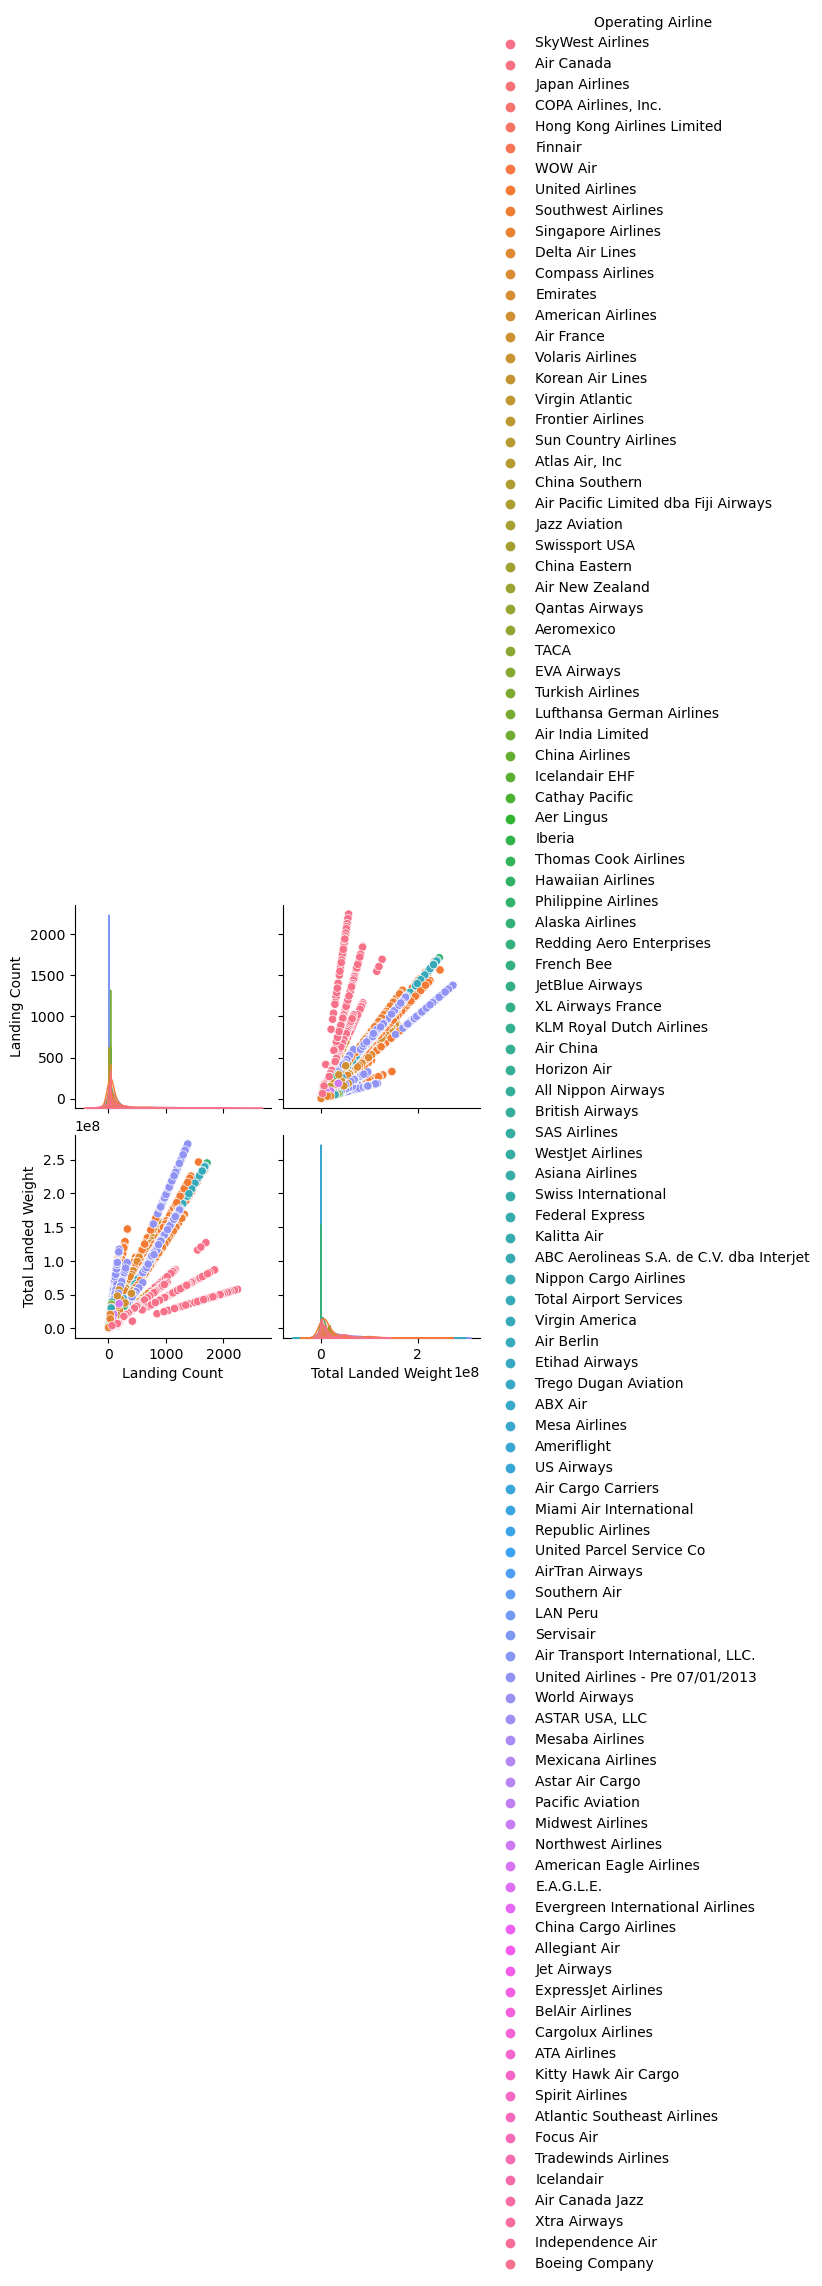

In [38]:
sns.pairplot(data, hue= 'Operating Airline')

In [40]:
data.to_csv('cleaned_air.csv',index = False)